In [1]:
import seaborn as sns
import pandas as pd
from constants import *
import pylab 
import pingouin as pg
from scipy.stats import mannwhitneyu
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
IDEOTYPES = {'T' : 'Blue',
             'dT' : 'Red', 'DT' : 'Red',
             'C' : 'Green', 'CT' : 'Green',
             'B' : 'Yellow'}
CONDITIONS = {'S' : 'Yellow', 'C': 'Blue'}

In [3]:
best_of_best_df = pd.read_csv('%s/best_of_best.csv' % RESULTS_DIR, skipinitialspace=True)
best_of_best_df

,arbor name,optimal G,optimal alpha,optimal pt distance
0,043_5_S_day5,-0.2,0.73,0.000022
1,091_4_S_day5,0.2,0.32,5.640579
2,022_5_C_day5,0.0,0.53,5.843141
3,220_1_C_day5,-0.2,0.33,4.725000
4,237_2_C_day5,-0.1,0.86,4.714365
...,...,...,...,...
3071,044_5_C_day5,0.1,0.55,31.449874
3072,008_4_S_day5,0.0,0.60,7.214820
3073,M058_1_S_1aba_day9,1.9,0.15,0.392902
3074,M248_2_C_nocyto_day9,0.1,0.75,10.324300


In [4]:
ideotypes_df = pd.read_csv('%s/manual_scoring_last_day.csv' % SCORING_DATA_DIR, skipinitialspace=True)
ideotypes_df['ideotype (T/C/B)'] = ideotypes_df['ideotype (T/C/B)'].replace('CT', 'C')
ideotypes_df['ideotype (T/C/B)'] = ideotypes_df['ideotype (T/C/B)'].replace('DT', 'dT')
ideotypes_df['ideotype'] = ideotypes_df['ideotype (T/C/B)'].map(IDEOTYPES)
ideotypes_df['condition'] = ideotypes_df['condition'].map(CONDITIONS)
ideotypes_df.dropna(subset=['ideotype'], inplace=True)

In [5]:
ideotypes_df

,experiment,Picture #,genotype,condition,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,PimpiBig4,233,1,Blue,C,L,NaN,LR up,Green
1,PimpiBig4,281,1,Blue,T,M,NaN,NaN,Blue
2,PimpiBig4,287,1,Blue,T,M,NaN,NaN,Blue
3,PimpiBig4,246,2,Yellow,C,L,IR,NaN,Green
4,PimpiBig4,263,3,Blue,dT,L,NaN,NaN,Red
...,...,...,...,...,...,...,...,...,...
1443,PimpiBig1,126,308,Blue,dT,M,NaN,NaN,Red
1444,PimpiBig1,144,308,Blue,C,M,NaN,NaN,Green
1445,PimpiBig1,87,308,Yellow,C,S,Y,NaN,Green
1446,PimpiBig1,131,308,Yellow,C,M,D,NaN,Green


In [6]:
metadata_df = pd.read_csv('%s/metadata.csv' % METADATA_DIR, skipinitialspace=True)
metadata_df['condition'] = metadata_df['condition'].map(CONDITIONS)
metadata_df['genotype'].unique()

array(['103', '031', '055', '098', '101', '059', '034', '030', '002',
       '001', '076', '102', '104', '080', '005', '081', '096', '028',
       '058', '009', '038', '079', '040', '035', '094', '074', '010',
       '032', '022', '003', '105', '056', '095', '011', '106', '075',
       '012', '033', '097', '013', '006', '007', '057', '008', '099',
       '029', '078', '037', '036', '292', '212', '307', '282', '199',
       '278', '301', '287', '213', '214', '286', '194', '285', '284',
       '196', '201', '279', '293', '280', '299', '207', '298', '200',
       '211', '308', '283', '306', '220', '290', '198', '195', '289',
       '300', '288', '291', '277', '197', '189', '294', '235', '230',
       '234', '173', '084', '240', '236', '241', '231', '176', '064',
       '228', '244', '237', '174', '274', '249', '247', '091', '227',
       '250', '093', '229', '271', '239', '221', '233', '225', '245',
       '273', '248', '089', '085', '259', '175', '087', '086', '092',
       '222', '090',

In [7]:
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition,hormone
0,PimpiBig4,103_4_S_day5,5,297,103,4,Yellow,NaN
1,PimpiBig4,031_3_S_day5,5,278,031,3,Yellow,NaN
2,PimpiBig4,055_2_S_day5,5,151,055,2,Yellow,NaN
3,PimpiBig4,098_1_S_day5,5,14,098,1,Yellow,NaN
4,PimpiBig4,101_1_S_day5,5,106,101,1,Yellow,NaN
...,...,...,...,...,...,...,...,...
9790,PimpiBig6,053_1_C_day5,5,226,053,1,Blue,NaN
9791,PimpiBig6,045_2_C_day5,5,227,045,2,Blue,NaN
9792,PimpiBig6,045_3_S_day5,5,228,045,3,Yellow,NaN
9793,PimpiBig6,053_2_S_day5,5,229,053,2,Yellow,NaN


In [8]:
arbor_stats_df = pd.merge(best_of_best_df, metadata_df, on = 'arbor name')

In [9]:
arbor_stats_df

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
0,043_5_S_day5,-0.2,0.73,0.000022,PimpiBig6,5,24,043,5,Yellow,NaN
1,091_4_S_day5,0.2,0.32,5.640579,PimpiBig3,5,54,091,4,Yellow,NaN
2,022_5_C_day5,0.0,0.53,5.843141,PimpiBig6,5,81,022,5,Blue,NaN
3,220_1_C_day5,-0.2,0.33,4.725000,PimpiBig1,5,60,220,1,Blue,NaN
4,237_2_C_day5,-0.1,0.86,4.714365,PimpiBig3,5,290,237,2,Blue,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3167,044_5_C_day5,0.1,0.55,31.449874,PimpiBig6,5,146,044,5,Blue,NaN
3168,008_4_S_day5,0.0,0.60,7.214820,PimpiBig4,5,105,008,4,Yellow,NaN
3169,M058_1_S_1aba_day9,1.9,0.15,0.392902,PimpiABA,9,50,M058,1,Yellow,1aba
3170,M248_2_C_nocyto_day9,0.1,0.75,10.324300,PimpiCyto,9,105,M248,2,Blue,nocyto


In [10]:
arbor_stats_df['genotype'] = arbor_stats_df['genotype'].astype(str).str.lstrip('0')
arbor_stats_df = arbor_stats_df.dropna(subset = ['condition'])

In [11]:
arbor_stats_df.isnull().sum()

arbor name                0
optimal G                 0
optimal alpha             0
optimal pt distance       0
experiment                0
day                       0
Picture #                 0
genotype                  0
replicate                 0
condition                 0
hormone                2564
dtype: int64

In [12]:
ideotypes_df.dtypes

experiment          object
Picture #            int64
genotype             int64
condition           object
ideotype (T/C/B)    object
size (L/M/S)        object
Sodium gap?         object
comments extra      object
ideotype            object
dtype: object

In [13]:
ideotypes_df['genotype'] = ideotypes_df['genotype'].astype(object)

In [14]:
ideotypes_df = ideotypes_df.dropna(subset = ['condition'])

In [15]:
ideotypes_df.isnull().sum()

experiment             0
Picture #              0
genotype               0
condition              0
ideotype (T/C/B)       0
size (L/M/S)           2
Sodium gap?          728
comments extra      1299
ideotype               0
dtype: int64

In [16]:
ideotypes_df

,experiment,Picture #,genotype,condition,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,PimpiBig4,233,1,Blue,C,L,NaN,LR up,Green
1,PimpiBig4,281,1,Blue,T,M,NaN,NaN,Blue
2,PimpiBig4,287,1,Blue,T,M,NaN,NaN,Blue
3,PimpiBig4,246,2,Yellow,C,L,IR,NaN,Green
4,PimpiBig4,263,3,Blue,dT,L,NaN,NaN,Red
...,...,...,...,...,...,...,...,...,...
1443,PimpiBig1,126,308,Blue,dT,M,NaN,NaN,Red
1444,PimpiBig1,144,308,Blue,C,M,NaN,NaN,Green
1445,PimpiBig1,87,308,Yellow,C,S,Y,NaN,Green
1446,PimpiBig1,131,308,Yellow,C,M,D,NaN,Green


In [17]:
arbor_stats_df

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
0,043_5_S_day5,-0.2,0.73,0.000022,PimpiBig6,5,24,43,5,Yellow,NaN
1,091_4_S_day5,0.2,0.32,5.640579,PimpiBig3,5,54,91,4,Yellow,NaN
2,022_5_C_day5,0.0,0.53,5.843141,PimpiBig6,5,81,22,5,Blue,NaN
3,220_1_C_day5,-0.2,0.33,4.725000,PimpiBig1,5,60,220,1,Blue,NaN
4,237_2_C_day5,-0.1,0.86,4.714365,PimpiBig3,5,290,237,2,Blue,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3167,044_5_C_day5,0.1,0.55,31.449874,PimpiBig6,5,146,44,5,Blue,NaN
3168,008_4_S_day5,0.0,0.60,7.214820,PimpiBig4,5,105,8,4,Yellow,NaN
3169,M058_1_S_1aba_day9,1.9,0.15,0.392902,PimpiABA,9,50,M058,1,Yellow,1aba
3170,M248_2_C_nocyto_day9,0.1,0.75,10.324300,PimpiCyto,9,105,M248,2,Blue,nocyto


In [18]:
common_values = set(arbor_stats_df[['experiment', 'genotype', 'condition', 'Picture #']].apply(tuple, axis=1)) & \
                set(ideotypes_df[['experiment', 'genotype', 'condition', 'Picture #']].apply(tuple, axis=1))
print(common_values)

set()


In [19]:
arbor_stats_df['genotype'] = arbor_stats_df['genotype'].astype(str)
ideotypes_df['genotype'] = ideotypes_df['genotype'].astype(str)

/var/folders/dx/7qsz_y4j3hzcbm5wnqnr8kdr0000gn/T/ipykernel_29753/326811934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arbor_stats_df['genotype'] = arbor_stats_df['genotype'].astype(str)
/var/folders/dx/7qsz_y4j3hzcbm5wnqnr8kdr0000gn/T/ipykernel_29753/326811934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ideotypes_df['genotype'] = ideotypes_df['genotype'].astype(str)


In [20]:
print(arbor_stats_df['genotype'].unique())

['43' '91' '22' '220' '237' '262' '256' '241' '214' '248' '44' 'LA1511'
 '8' '283' '229' '230' '227' '272' '213' '251' '92' '38' '85' '59' '2'
 '57' '139' '193' '175' '141' '64' '31' '82' '95' '28' '49' '5' '50' '194'
 'la1511' '172' '146' '271' '253' '244' '211' '269' '225' '298' '270'
 '267' '29' '307' 'm248' '48' '58' '201' '138' '291' '288' '235' '260'
 '222' '277' '84' '300' '169' '196' '250' '9' '10' '45' '24' '80' '236'
 '101' '191' '19' '17' '42' '89' '76' '23' '87' '78' '90' 'M058' '258'
 '239' '293' '79' '54' '294' '81' '53' 'm058' '103' '40' '15' '21' '74'
 '104' '233' '165' 'M248' '12' '1511' '73' '46' '27' '72' '93' '279' '286'
 '33' '99' '97' '52' '7' '170' '247' '273' '144' '34' '61' '55' '179'
 '240' '274' '301' '200' '255' '261' '290' '306' '245' '207' '252' '299'
 '268' '86' '11' '69' '96' '199' '166' '197' '168' '264' '231' '228' '282'
 '249' '212' '221' '285' '173' '147' '94' '83' '30' '65' '174' '192' '140'
 '56' '3' '234' '287' '278' '280' '308' '176' '142' '60' '

In [21]:
test = pd.merge(arbor_stats_df, ideotypes_df, on = ['experiment', 'genotype','condition', 'Picture #'])
test

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,043_5_S_day5,-0.2,0.73,0.000022,PimpiBig6,5,24,43,5,Yellow,NaN,C,S,IR,NaN,Green
1,091_4_S_day5,0.2,0.32,5.640579,PimpiBig3,5,54,91,4,Yellow,NaN,C,L,Y,NaN,Green
2,022_5_C_day5,0.0,0.53,5.843141,PimpiBig6,5,81,22,5,Blue,NaN,dT,L,NaN,NaN,Red
3,220_1_C_day5,-0.2,0.33,4.725000,PimpiBig1,5,60,220,1,Blue,NaN,C,S,NaN,infected,Green
4,237_2_C_day5,-0.1,0.86,4.714365,PimpiBig3,5,290,237,2,Blue,NaN,T,M,NaN,NaN,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,272_1_S_day5,-0.2,0.50,0.523962,PimpiBig2,5,59,272,1,Yellow,NaN,T,M,Y,NaN,Blue
2102,230_2_S_day5,0.0,0.40,7.417011,PimpiBig3,5,10,230,2,Yellow,NaN,dT,M,Y,NaN,Red
2103,251_2_C_day5,-0.2,0.55,22.465521,PimpiBig2,5,113,251,2,Blue,NaN,dT,L,NaN,NaN,Red
2104,213_1_C_day5,0.0,0.85,20.900580,PimpiBig1,5,198,213,1,Blue,NaN,T,M,NaN,bit dried up plate,Blue


In [22]:
print(arbor_stats_df[['experiment', 'Picture #', 'genotype', 'condition']].isnull().sum())


experiment    0
Picture #     0
genotype      0
condition     0
dtype: int64


In [23]:
print(ideotypes_df[['experiment', 'Picture #', 'genotype', 'condition']].isnull().sum())

experiment    0
Picture #     0
genotype      0
condition     0
dtype: int64


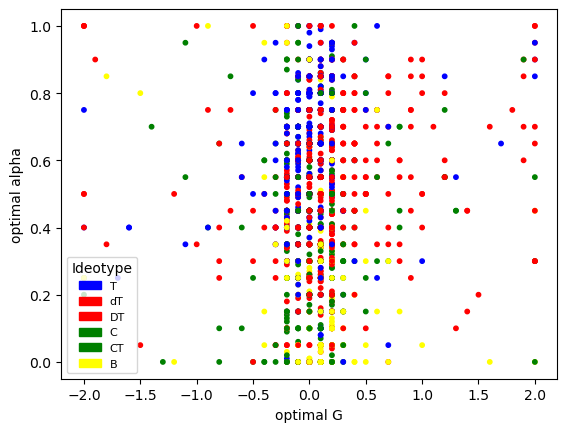

In [24]:
results = test.plot.scatter(x = 'optimal G', y = 'optimal alpha', c='ideotype', s = 10)

# Define the colors based on the IDEOTYPES dictionary
color_mapping = {v: k for k, v in IDEOTYPES.items()}

# Create a custom legend using patches for each color in IDEOTYPES
legend_labels = [mpatches.Patch(color=color, label=key) for key, color in IDEOTYPES.items()]

# Add the legend to the plot
plt.legend(handles=legend_labels, title="Ideotype", loc='best', fontsize=8, title_fontsize=10, markerscale=0.5)

# Display the plot
plt.show()

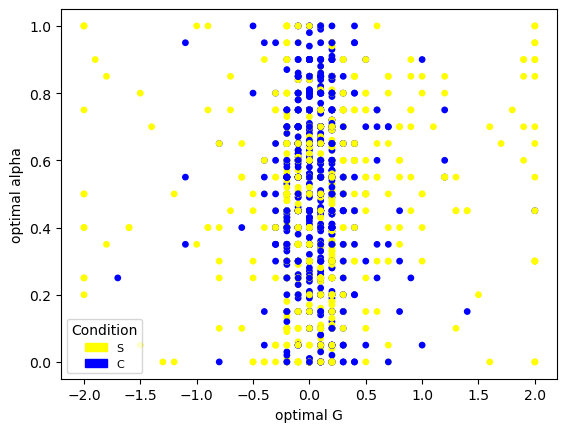

In [25]:
results = test.plot.scatter(x = 'optimal G', y = 'optimal alpha', c='condition', s = 15)
#Salt is Yellow, Control is Blue

# Define the colors based on the IDEOTYPES dictionary
color_mapping = {v: k for k, v in CONDITIONS.items()}

# Create a custom legend using patches for each color in IDEOTYPES
legend_labels = [mpatches.Patch(color=color, label=key) for key, color in CONDITIONS.items()]

# Add the legend to the plot
plt.legend(handles=legend_labels, title="Condition", loc='best', fontsize=8, title_fontsize=10, markerscale=0.5)

# Display the plot
plt.show()

In [26]:
last_day_arbors = arbor_stats_df.sort_values('day', ascending=False)
last_day_arbors = last_day_arbors.drop_duplicates(['experiment', 'genotype', 'replicate', 'condition'])
last_day_arbors

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
3171,LA1511_7_C_nocyto_day9,0.4,0.75,3.795576,PimpiCyto,9,47,LA1511,7,Blue,nocyto
587,248_1_C_noiaa_day9,-0.2,0.70,19.738229,PimpiIAA1,9,48,248,1,Blue,noiaa
575,058_10_C_noiaa_day9,0.0,0.78,1.532863,PimpiIAA1,9,117,58,10,Blue,noiaa
1397,la1511_2_C_noacc_day9,0.2,0.00,1.203445,PimpiACC,9,83,la1511,2,Blue,noacc
1396,M248_6_C_noaba_day9,0.2,0.90,43.557621,PimpiABA,9,99,M248,6,Blue,noaba
...,...,...,...,...,...,...,...,...,...,...,...
70,222_2_C_day5,-0.1,0.35,96.311547,PimpiBig3,5,265,222,2,Blue,NaN
71,277_2_C_day5,0.2,0.57,20.706890,PimpiBig1,5,181,277,2,Blue,NaN
72,084_4_S_day5,0.1,0.05,26.391756,PimpiBig3,5,129,84,4,Yellow,NaN
73,300_2_C_day5,0.0,0.41,36.147202,PimpiBig1,5,117,300,2,Blue,NaN


In [27]:
ideotypes_df['genotype'] = ideotypes_df['genotype'].astype(str)
last_day_arbors['genotype'] = last_day_arbors['genotype'].astype(str)

/var/folders/dx/7qsz_y4j3hzcbm5wnqnr8kdr0000gn/T/ipykernel_29753/165263363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ideotypes_df['genotype'] = ideotypes_df['genotype'].astype(str)


In [28]:
ideotypes_df.dtypes

experiment          object
Picture #            int64
genotype            object
condition           object
ideotype (T/C/B)    object
size (L/M/S)        object
Sodium gap?         object
comments extra      object
ideotype            object
dtype: object

In [29]:
last_day_arbors.dtypes

arbor name              object
optimal G              float64
optimal alpha          float64
optimal pt distance    float64
experiment              object
day                      int64
Picture #                int64
genotype                object
replicate                int64
condition               object
hormone                 object
dtype: object

In [30]:
last_day_arbors['genotype'].unique()

array(['LA1511', '248', '58', 'la1511', 'M248', 'M058', '1511', 'm058',
       'm248', 'LA511', '271', '140', '64', '52', '79', '80', '102',
       '136', '50', '94', '5', '299', '73', '12', '173', '96', '91', '56',
       '97', '72', '268', '174', '43', '147', '9', '49', '44', '65',
       '274', '3', '292', '81', '259', '262', '273', '33', '99', '8',
       '237', '192', '240', '138', '11', '285', '22', '105', '212', '247',
       '75', '20', '249', '282', '69', '30', '13', '46', '86', '84',
       '228', '235', '90', '7', '89', '76', '67', '32', '70', '98', '23',
       '293', '301', '31', '239', '142', '176', '1', '200', '53', '34',
       '144', '6', '24', '45', '231', '264', '250', '199', '17', '87',
       '55', '171', '61', '42', '179', '166', '197', '168', '191', '236',
       '60', '196', '261', '103', '29', '290', '83', '278', '169', '74',
       '48', '245', '15', '40', '93', '207', '37', '252', '14', '233',
       '234', '101', '170', '88', '35', '255', '104', '306', '308'

In [31]:
ideotypes_df['genotype'].unique()

array(['1', '2', '3', '5', '6', '8', '9', '10', '11', '12', '13', '14',
       '15', '17', '19', '20', '21', '22', '23', '24', '27', '28', '29',
       '30', '31', '33', '34', '35', '36', '37', '38', '40', '42', '43',
       '44', '45', '46', '48', '49', '50', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '69', '70', '72', '73', '74', '75', '76', '78', '79', '80', '81',
       '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92',
       '93', '94', '95', '96', '98', '99', '101', '102', '103', '104',
       '105', '106', '107', '108', '109', '111', '112', '113', '115',
       '116', '117', '118', '119', '120', '121', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '135', '136', '138',
       '139', '140', '141', '142', '143', '144', '146', '147', '149',
       '150', '151', '153', '154', '155', '156', '157', '158', '159',
       '160', '162', '165', '166', '167', '168', '169', '170', '171',

In [32]:
print(last_day_arbors[['experiment', 'Picture #', 'genotype', 'condition']].isnull().sum())

experiment    0
Picture #     0
genotype      0
condition     0
dtype: int64


In [33]:
print(ideotypes_df[['experiment', 'Picture #', 'genotype', 'condition']].isnull().sum())

experiment    0
Picture #     0
genotype      0
condition     0
dtype: int64


In [34]:

ideotypes_df.dropna(subset=['experiment', 'Picture #', 'genotype', 'condition'], inplace=True)

/var/folders/dx/7qsz_y4j3hzcbm5wnqnr8kdr0000gn/T/ipykernel_29753/4184424884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ideotypes_df.dropna(subset=['experiment', 'Picture #', 'genotype', 'condition'], inplace=True)


In [35]:

print(ideotypes_df[['experiment', 'Picture #', 'genotype', 'condition']].drop_duplicates().head())

  experiment  Picture # genotype condition
0  PimpiBig4        233        1      Blue
1  PimpiBig4        281        1      Blue
2  PimpiBig4        287        1      Blue
3  PimpiBig4        246        2    Yellow
4  PimpiBig4        263        3      Blue


In [36]:
print(last_day_arbors[['experiment', 'Picture #', 'genotype', 'condition']].drop_duplicates().head())

     experiment  Picture # genotype condition
3171  PimpiCyto         47   LA1511      Blue
587   PimpiIAA1         48      248      Blue
575   PimpiIAA1        117       58      Blue
1397   PimpiACC         83   la1511      Blue
1396   PimpiABA         99     M248      Blue


In [37]:
last_day_arbors
last_day_arbors['genotype'] = last_day_arbors['genotype'].astype(str).str.lstrip('0')
last_day_arbors

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
3171,LA1511_7_C_nocyto_day9,0.4,0.75,3.795576,PimpiCyto,9,47,LA1511,7,Blue,nocyto
587,248_1_C_noiaa_day9,-0.2,0.70,19.738229,PimpiIAA1,9,48,248,1,Blue,noiaa
575,058_10_C_noiaa_day9,0.0,0.78,1.532863,PimpiIAA1,9,117,58,10,Blue,noiaa
1397,la1511_2_C_noacc_day9,0.2,0.00,1.203445,PimpiACC,9,83,la1511,2,Blue,noacc
1396,M248_6_C_noaba_day9,0.2,0.90,43.557621,PimpiABA,9,99,M248,6,Blue,noaba
...,...,...,...,...,...,...,...,...,...,...,...
70,222_2_C_day5,-0.1,0.35,96.311547,PimpiBig3,5,265,222,2,Blue,NaN
71,277_2_C_day5,0.2,0.57,20.706890,PimpiBig1,5,181,277,2,Blue,NaN
72,084_4_S_day5,0.1,0.05,26.391756,PimpiBig3,5,129,84,4,Yellow,NaN
73,300_2_C_day5,0.0,0.41,36.147202,PimpiBig1,5,117,300,2,Blue,NaN


In [38]:
arbor_ideotypes = pd.merge(last_day_arbors, ideotypes_df)
arbor_ideotypes

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,271_2_C_day5,0.0,0.20,3.775579,PimpiBig3,5,187,271,2,Blue,NaN,B,M,NaN,NaN,Yellow
1,140_2_C_day5,0.0,0.45,10.432572,PimpiBig2,5,10,140,2,Blue,NaN,C,M,NaN,NaN,Green
2,064_2_C_day5,0.2,0.55,7.457205,PimpiBig3,5,148,64,2,Blue,NaN,dT,M,NaN,NaN,Red
3,052_3_S_day5,0.2,0.10,27.670698,PimpiBig6,5,101,52,3,Yellow,NaN,B,M,Y,NaN,Yellow
4,136_1_S_day5,0.2,0.60,3.019961,PimpiBig2,5,218,136,1,Yellow,NaN,T,M,Y,NaN,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,222_2_C_day5,-0.1,0.35,96.311547,PimpiBig3,5,265,222,2,Blue,NaN,T,L,NaN,NaN,Blue
1034,277_2_C_day5,0.2,0.57,20.706890,PimpiBig1,5,181,277,2,Blue,NaN,T,L,NaN,infected & dried up,Blue
1035,084_4_S_day5,0.1,0.05,26.391756,PimpiBig3,5,129,84,4,Yellow,NaN,dT,L,IR,NaN,Red
1036,300_2_C_day5,0.0,0.41,36.147202,PimpiBig1,5,117,300,2,Blue,NaN,B,L,NaN,NaN,Yellow


In [143]:
for file in os.listdir(RECONSTRUCTIONS_DIR):
    parts = file.split("_")
    print(parts)
    genotype = parts[0]
    replicate = parts[1]
    condition = parts[2]
    day = parts[3].replace('.csv', '')
    print(genotype, replicate, condition, day)
    key = (genotype, replicate, condition)
    #print(key)
    break

['001', '1', 'C', 'day2.csv']
001 1 C day2


In [140]:
def get_last_day_files():
    files_by_genotype = {}
    
    for file_name in os.listdir(RECONSTRUCTIONS_DIR):
        parts = file_name.split('_')
        
        genotype = parts[0]
        replicate = parts[1]
        condition = parts[2]
        day = parts[3].replace('.csv', '')
        
        key = (genotype, replicate, condition)
        if key not in files_by_genotype:
            files_by_genotype[key] = {}
        
        files_by_genotype[key][day] = file_name
       
    last_day_files = {}
    for key, day_files in files_by_genotype.items():
        last_day = sorted(day_files.keys())[-1]
        last_day_files[key] = day_files[last_day]
    return last_day_files
